In [0]:
import gc 
gc.collect()
import numpy as np
import os
import time
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Dropout, Flatten, Reshape, Input, Dense, GlobalAveragePooling2D
from keras.layers.core import Activation, Dense, Lambda
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.engine.topology import Layer
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD 
import os
import sys
import glob
import shutil
import random
from random import randint
import numpy as np 
from PIL import Image
from PIL import ImageFilter
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.layers import merge, Input
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
!pip install -U -q PyDrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authentification Google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='dataset.tar'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('dataset.tar')
# ceci cree le dataset a la racine

In [0]:
gc.collect()

823

In [0]:
# dans content ie a la racine
!tar -xvf dataset.tar
# le dossier test2 apparait

test2/
test2/benign/
test2/malign/
test2/malign/SOB_M_DC-14-10926-100-001.png
test2/malign/SOB_M_DC-14-10926-100-002.png
test2/malign/SOB_M_DC-14-10926-100-003.png
test2/malign/SOB_M_DC-14-10926-100-004.png
test2/malign/SOB_M_DC-14-10926-100-005.png
test2/malign/SOB_M_DC-14-10926-100-006.png
test2/malign/SOB_M_DC-14-10926-100-007.png
test2/malign/SOB_M_DC-14-10926-100-008.png
test2/malign/SOB_M_DC-14-10926-100-009.png
test2/malign/SOB_M_DC-14-10926-100-010.png
test2/malign/SOB_M_DC-14-10926-200-001.png
test2/malign/SOB_M_DC-14-10926-200-002.png
test2/malign/SOB_M_DC-14-10926-200-003.png
test2/malign/SOB_M_DC-14-10926-200-004.png
test2/malign/SOB_M_DC-14-10926-200-005.png
test2/malign/SOB_M_DC-14-10926-200-006.png
test2/malign/SOB_M_DC-14-10926-200-007.png
test2/malign/SOB_M_DC-14-10926-200-008.png
test2/malign/SOB_M_DC-14-10926-200-009.png
test2/malign/SOB_M_DC-14-10926-40-001.png
test2/malign/SOB_M_DC-14-10926-40-002.png
test2/malign/SOB_M_DC-14-10926-40-003.png
test2/malign/SOB_M_DC-

In [0]:
import gc

In [0]:
gc.collect()

0

In [0]:
# To load the whole dataset (7909 images)
# Define data path
PATH='/content/test2'
data_path = PATH 
data_dir_list = os.listdir(data_path)
img_data_list=[]
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        img_path = data_path + '/'+ dataset + '/'+ img
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
#x = x/255
        #print('Input image shape:', x.shape)
        img_data_list.append(x)
        gc.collect()

Loaded the images of dataset-benign



In [0]:
import gc
gc.collect()

0

In [0]:
img_data = np.array(img_data_list)

In [0]:
import gc
gc.collect()

0

In [0]:
print (img_data.shape)

(7909, 1, 224, 224, 3)


In [0]:
img_data=np.rollaxis(img_data,1,0)
img_data=img_data[0]

In [0]:
import gc
gc.collect()

0

In [0]:
# Define the number of classes
num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

In [0]:
import gc
gc.collect()

0

In [0]:
labels[0:302]=0
labels[302:]=1
names = ['benign','malign']
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [0]:
import gc
gc.collect()

0

In [0]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [0]:
import gc
gc.collect()

0

In [0]:
# Custom_vgg_model_1
#Training the classifier alone
image_input = Input(shape=(224, 224, 3))
model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')





553467904/553467096 [==============================] - 15s 0us/step




In [0]:
gc.collect()

0

In [0]:
last_layer = model.get_layer('fc2').output

In [0]:
import gc
gc.collect()

0

In [0]:
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
#custom_vgg_model.summary()

In [0]:
import gc
gc.collect()

8

In [0]:
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

In [0]:
import gc
gc.collect()

90

In [0]:
custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [0]:
import gc
gc.collect()

0

In [0]:
import time
t=time.time()
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 6327 samples, validate on 1582 samples
Epoch 1/12


In [0]:
#Training the feature extraction also

image_input = Input(shape=(224, 224, 3))
model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
#model.summary()

In [0]:
# to fine tune our model
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model2 = Model(image_input, out)

In [0]:
# 1 st technique: for transfer learning
# freeze all the layers except the dense layers
for layer in custom_vgg_model2.layers[:-3]:
    layer.trainable = False

In [0]:
custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

In [0]:
t=time.time()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

In [0]:
# original code
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(12)

In [0]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [0]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4) 
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic']) 

In [0]:
###############   NOUVELLE SECTION : ECHANTILLONAGE ALEATOIRE  #############################

In [0]:
# Define data path

PATH='/content/test2'
data_path = PATH 
data_dir_list = os.listdir(data_path)
img_data_list=[]
for dataset in data_dir_list:
  if dataset == 'benign':
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        img_path = data_path + '/'+ dataset + '/'+ img
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
    
#x = x/255

        #print('Input image shape:', x.shape)
        img_data_list.append(x)
    else:
      break

Loaded the images of dataset-benign



In [0]:
# Define data path

PATH='/content/test2'
data_path = PATH 
data_dir_list = os.listdir(data_path)
img_data_list1=[]
for dataset in data_dir_list:
  if dataset == 'malign':
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        img_path = data_path + '/'+ dataset + '/'+ img
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
    
#x = x/255

        #print('Input image shape:', x.shape)
        img_data_list1.append(x)
    else:
      break

Loaded the images of dataset-malign



In [0]:
len(img_data_list)
len(img_data_list1)

5429

In [0]:
tab1=[]
for i in range (0,784):
  index = random.randrange(i,2480)
  tab1.append(img_data_list[index])
#rm = random.sample('/content/test2/malig-p=[ih885+-n',2746)
#conc = rb + rm
len(tab1)

784

In [0]:
tab2=[]
for i in range (0,1716):
  index = random.randrange(i,5429)
  tab2.append(img_data_list1[index])
#rm = random.sample('/content/test2/malig-p=[ih885+-n',2746)
#conc = rb + rm
len(tab2)

1716

In [0]:
tabT = tab1 + tab2
len(tabT)

2500

In [0]:
img_dataT = np.array(tabT)
img_data=np.rollaxis(img_dataT,1,0)
img_data=img_data[0]
print (img_data.shape)

(2500, 224, 224, 3)


In [0]:
# Define the number of classes
num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

In [0]:
labels[0:202]=0 # number of benign
labels[202:]=1 # number of malign
names = ['benign','malign']
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [0]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)


In [0]:
# transfer learning as feature extractor

In [0]:
# Custom_vgg_model_1
#Training the classifier alone
image_input = Input(shape=(224, 224, 3))
model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
last_layer = model.get_layer('fc2').output

In [0]:

out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)

In [0]:
#custom_vgg_model.summary()

In [0]:

for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

In [0]:
#custom_vgg_model.summary()

In [0]:

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [0]:
import time
t=time.time()
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Instructions for updating:
Use tf.cast instead.
Train on 2070 samples, validate on 230 samples
Epoch 1/12
2070/2070 [==============================] - 22s 10ms/step - loss: 0.4263 - acc: 0.8696 - val_loss: 0.3290 - val_acc: 0.9130
Epoch 2/12
2070/2070 [==============================] - 11s 5ms/step - loss: 0.3380 - acc: 0.8860 - val_loss: 0.4099 - val_acc: 0.9130
Epoch 3/12
2070/2070 [==============================] - 11s 5ms/step - loss: 0.3049 - acc: 0.8961 - val_loss: 0.6234 - val_acc: 0.9130
Epoch 4/12
2070/2070 [==============================] - 12s 6ms/step - loss: 0.2793 - acc: 0.9014 - val_loss: 0.4252 - val_acc: 0.9130
Epoch 5/12
2070/2070 [==============================] - 12s 6ms/step - loss: 0.2421 - acc: 0.9150 - val_loss: 0.4266 - val_acc: 0.9130
Epoch 6/12
2070/2070 [==============================] - 12s 6ms/step - loss: 0.2362 - acc: 0.9130 - val_loss: 0.4029 - val_acc: 0.8261
Epoch 7/12
2070/2070 [==============================] - 12s 6ms/step - loss: 0.2130 - acc: 0.9

In [0]:
#Training the feature extraction also

image_input = Input(shape=(224, 224, 3))
model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
#model.summary()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# to fine tune our model
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model2 = Model(image_input, out)

In [0]:
# to fine tune our model
last_layer = model.get_layer('block4_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model2 = Model(image_input, out)

In [0]:
# 1 st technique: for transfer learning
# freeze all the layers except the dense layers
for layer in custom_vgg_model2.layers[:-6]:
    layer.trainable = False

In [0]:
custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

In [0]:
t=time.time()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 2070 samples, validate on 230 samples
Epoch 1/12
2070/2070 [==============================] - 22s 11ms/step - loss: 1.4141 - acc: 0.9048 - val_loss: 1.4016 - val_acc: 0.9130
Epoch 2/12
2070/2070 [==============================] - 19s 9ms/step - loss: 1.4171 - acc: 0.9121 - val_loss: 1.4016 - val_acc: 0.9130
Epoch 3/12
2070/2070 [==============================] - 20s 9ms/step - loss: 1.4171 - acc: 0.9121 - val_loss: 1.4016 - val_acc: 0.9130
Epoch 4/12
2070/2070 [==============================] - 20s 10ms/step - loss: 1.4171 - acc: 0.9121 - val_loss: 1.4016 - val_acc: 0.9130
Epoch 5/12
2070/2070 [==============================] - 20s 9ms/step - loss: 1.4171 - acc: 0.9121 - val_loss: 1.4016 - val_acc: 0.9130
Epoch 6/12
2070/2070 [==============================] - 20s 9ms/step - loss: 1.4171 - acc: 0.9121 - val_loss: 1.4016 - val_acc: 0.9130
Epoch 7/12
2070/2070 [==============================] - 20s 9ms/step - loss: 1.4171 - acc: 0.9121 - val_loss: 1.4016 - val_acc: 0.9130
Epoch 

In [0]:
# Evaluating the model with a loaded image

score = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)
y_pred = custom_vgg_model2.predict(test_image)

#print(custom_vgg_model.predict(test_image))
print(custom_vgg_model2.predict(test_image))
print(y_test[0:1])

Test Loss: 0.2963612252473831
Test accuracy: 0.9119999957084656
(1, 224, 224, 3)
[[0.10413825 0.8958617 ]]
[[1. 0.]]


In [0]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
print(conf)

In [0]:
import cv2

In [0]:
# test on new images
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
image = load_img('/content/SOB_M_DC-14-2523-40-015.png', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = custom_vgg_model2.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

FileNotFoundError: ignored

In [0]:

# Testing a new image 
import cv2
num_channel=3
test_image = cv2.imread('/content/SOB_M_DC-14-2523-40-015.png')
#print(test_image.shape)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(224,224))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
# Predicting the test image
print((custom_vgg_model2.predict(test_image)))
#print(custom_vgg_model.predict_classes(test_image))


(224, 224)
(1, 224, 224)


ValueError: ignored

In [0]:
# other methods of transfer learning using data generator

In [0]:
# original code
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(12)

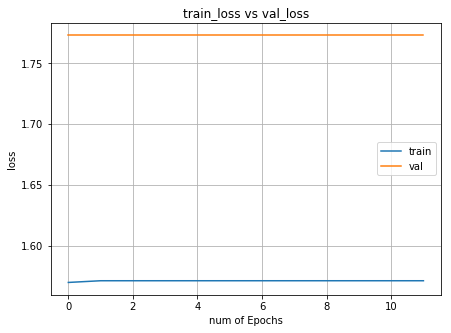

In [0]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

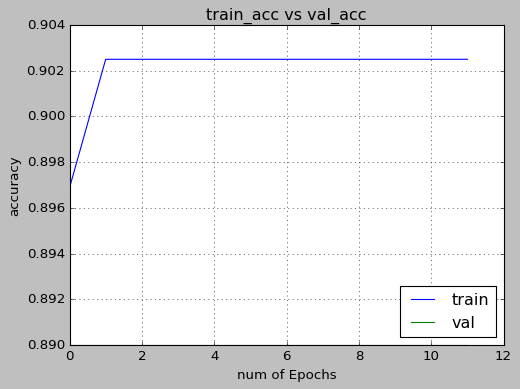

In [0]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4) 
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic']) 

In [0]:
# OTHERS METHODS OF FINE TUNING

In [0]:
image_input = Input(shape=(224, 224, 3))
model = VGG16(input_tensor=image_input, include_top=False,weights=None)
#model.summary()

In [0]:
# to fine tune our model
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dense(256, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x) # train a linear classifier
custom_vgg_model2 = Model(image_input, out)

In [0]:
# to add regularization

from keras import models
from keras import layers
from keras import optimizers
 
model = models.Sequential()
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5, Input(shape=(224, 224, 3))))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(2, activation='softmax'))

In [0]:
# 1 : fine tuning total (Ici, on entraîne tout le réseau, donc il faut rendre toutes les couches "entraînables" et les poids aleatoires)
for layer in custom_vgg_model2.layers:
    layer.trainable = True
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9,nesterov=True)

custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

t=time.time()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 2070 samples, validate on 230 samples
Epoch 1/12
2070/2070 [==============================] - 40s 19ms/step - loss: 0.2984 - acc: 0.9121 - val_loss: 0.2752 - val_acc: 0.9130
Epoch 2/12
2070/2070 [==============================] - 32s 16ms/step - loss: 0.2771 - acc: 0.9121 - val_loss: 0.2711 - val_acc: 0.9130
Epoch 3/12
2070/2070 [==============================] - 32s 15ms/step - loss: 0.2706 - acc: 0.9121 - val_loss: 0.2677 - val_acc: 0.9130
Epoch 4/12
2070/2070 [==============================] - 32s 15ms/step - loss: 0.2683 - acc: 0.9121 - val_loss: 0.2659 - val_acc: 0.9130
Epoch 5/12
2070/2070 [==============================] - 32s 15ms/step - loss: 0.2717 - acc: 0.9121 - val_loss: 0.2654 - val_acc: 0.9130
Epoch 6/12
2070/2070 [==============================] - 32s 15ms/step - loss: 0.2711 - acc: 0.9121 - val_loss: 0.2760 - val_acc: 0.9130
Epoch 7/12
2070/2070 [==============================] - 32s 15ms/step - loss: 0.2642 - acc: 0.9121 - val_loss: 0.2653 - val_acc: 0.9130
E

In [0]:
# CHECK FOR OVERFITTING

In [0]:
# original code
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(12)

In [0]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [0]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4) 
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic']) 

In [0]:
# 2 : Feature extractor ( Voir plus haut)
# 1 st technique: for transfer learning
# freeze all the layers except the dense layers
for layer in custom_vgg_model2.layers[:-3]:
    layer.trainable = False
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9,nesterov=True)
custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

t=time.time()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 2070 samples, validate on 230 samples
Epoch 1/12
2070/2070 [==============================] - 13s 6ms/step - loss: 0.2513 - acc: 0.9121 - val_loss: 0.2656 - val_acc: 0.9130
Epoch 2/12
2070/2070 [==============================] - 13s 6ms/step - loss: 0.2508 - acc: 0.9121 - val_loss: 0.2672 - val_acc: 0.9130
Epoch 3/12
2070/2070 [==============================] - 13s 6ms/step - loss: 0.2531 - acc: 0.9121 - val_loss: 0.2654 - val_acc: 0.9130
Epoch 4/12
2070/2070 [==============================] - 12s 6ms/step - loss: 0.2492 - acc: 0.9121 - val_loss: 0.2702 - val_acc: 0.9130
Epoch 5/12
2070/2070 [==============================] - 12s 6ms/step - loss: 0.2484 - acc: 0.9121 - val_loss: 0.2645 - val_acc: 0.9130
Epoch 6/12
2070/2070 [==============================] - 12s 6ms/step - loss: 0.2483 - acc: 0.9121 - val_loss: 0.2775 - val_acc: 0.9130
Epoch 7/12
2070/2070 [==============================] - 12s 6ms/step - loss: 0.2465 - acc: 0.9121 - val_loss: 0.2736 - val_acc: 0.9130
Epoch 8/

In [0]:
# 3 : fine tuning partiel(On entraîne le nouveau classifieur et les couches hautes)
# Ne pas entraîner les 5 premières couches (les plus basses) 
for layer in custom_vgg_model2.layers[:5]:
    layer.trainable = False
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9,nesterov=True)
custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

t=time.time()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 2070 samples, validate on 230 samples
Epoch 1/12
2070/2070 [==============================] - 13s 6ms/step - loss: 0.2412 - acc: 0.9121 - val_loss: 0.2661 - val_acc: 0.9130
Epoch 2/12
2070/2070 [==============================] - 12s 6ms/step - loss: 0.2400 - acc: 0.9121 - val_loss: 0.2635 - val_acc: 0.9130
Epoch 3/12
2070/2070 [==============================] - 12s 6ms/step - loss: 0.2366 - acc: 0.9121 - val_loss: 0.2700 - val_acc: 0.9130
Epoch 4/12
2070/2070 [==============================] - 12s 6ms/step - loss: 0.2361 - acc: 0.9121 - val_loss: 0.2648 - val_acc: 0.9130
Epoch 5/12
2070/2070 [==============================] - 12s 6ms/step - loss: 0.2347 - acc: 0.9121 - val_loss: 0.2678 - val_acc: 0.9130
Epoch 6/12
2070/2070 [==============================] - 12s 6ms/step - loss: 0.2351 - acc: 0.9126 - val_loss: 0.2676 - val_acc: 0.9130
Epoch 7/12
2070/2070 [==============================] - 12s 6ms/step - loss: 0.2333 - acc: 0.9121 - val_loss: 0.2773 - val_acc: 0.9130
Epoch 8/

In [0]:
last_layer = model.get_layer('fc2').output
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)

In [0]:
# layer wise fine tuning

In [0]:
print('Fine-tuning AlexNet')
alex_net = AlexNet(labels.shape[1], weights_file)
alex_net.fit(X_train, X_val, y_train, y_val, freeze=True, epochs=1000, lr=0.001)

In [0]:
# fine tune the last layer
#Training the classifier alone
image_input = Input(shape=(224, 224, 3))
model = VGG16(input_tensor=image_input, include_top=False,weights=None)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# to fine tune our model
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model2 = Model(image_input, out)

In [0]:


for layer in custom_vgg_model2.layers[:-1]:
    layer.trainable = False
#custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [0]:
sgd = SGD(lr=0, decay=1e-6, momentum=0.9,nesterov=True)
custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
t=time.time()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


Train on 1600 samples, validate on 400 samples
Epoch 1/12
1600/1600 [==============================] - 11s 7ms/step - loss: 0.4381 - acc: 0.9019 - val_loss: 0.4452 - val_acc: 0.8875
Epoch 2/12
1600/1600 [==============================] - 10s 7ms/step - loss: 0.4381 - acc: 0.9019 - val_loss: 0.4452 - val_acc: 0.8875
Epoch 3/12
1600/1600 [==============================] - 11s 7ms/step - loss: 0.4381 - acc: 0.9019 - val_loss: 0.4452 - val_acc: 0.8875
Epoch 4/12
1600/1600 [==============================] - 11s 7ms/step - loss: 0.4381 - acc: 0.9019 - val_loss: 0.4452 - val_acc: 0.8875
Epoch 5/12
1600/1600 [==============================] - 11s 7ms/step - loss: 0.4381 - acc: 0.9019 - val_loss: 0.4452 - val_acc: 0.8875
Epoch 6/12
1600/1600 [==============================] - 10s 6ms/step - loss: 0.4381 - acc: 0.9019 - val_loss: 0.4452 - val_acc: 0.8875
Epoch 7/12
1600/1600 [==============================] - 10s 6ms/step - loss: 0.4381 - acc: 0.9019 - val_loss: 0.4452 - val_acc: 0.8875
Epoch 8/

In [0]:
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9,nesterov=True)
custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
t=time.time()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


Train on 1600 samples, validate on 400 samples
Epoch 1/12
1600/1600 [==============================] - 11s 7ms/step - loss: 0.3821 - acc: 0.9019 - val_loss: 0.3584 - val_acc: 0.8875
Epoch 2/12
1600/1600 [==============================] - 11s 7ms/step - loss: 0.3326 - acc: 0.9019 - val_loss: 0.3495 - val_acc: 0.8875
Epoch 3/12
1600/1600 [==============================] - 11s 7ms/step - loss: 0.3260 - acc: 0.9019 - val_loss: 0.3492 - val_acc: 0.8875
Epoch 4/12
1600/1600 [==============================] - 11s 7ms/step - loss: 0.3248 - acc: 0.9019 - val_loss: 0.3495 - val_acc: 0.8875
Epoch 5/12
1600/1600 [==============================] - 10s 7ms/step - loss: 0.3245 - acc: 0.9019 - val_loss: 0.3500 - val_acc: 0.8875
Epoch 6/12
1600/1600 [==============================] - 10s 7ms/step - loss: 0.3244 - acc: 0.9019 - val_loss: 0.3499 - val_acc: 0.8875
Epoch 7/12
1600/1600 [==============================] - 10s 6ms/step - loss: 0.3245 - acc: 0.9019 - val_loss: 0.3500 - val_acc: 0.8875
Epoch 8/

In [0]:
def f(x):
  sgd = SGD(lr=x, decay=1e-6, momentum=0.9,nesterov=True)
  custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
  t=time.time()
  hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
  print('Training time: %s' % (t - time.time()))
  (loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)
  print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

In [0]:
# 16 fois les iterations
L=3
x=0
decay=1e-6
epochs=12
for l in range (L,0,-1):
  f(x)
  if (l==L):
    x=1e-3
  else:
    x=x*1/(1+decay*epochs)
  

Instructions for updating:
Use tf.cast instead.
Train on 2250 samples, validate on 250 samples
Epoch 1/12
2250/2250 [==============================] - 23s 10ms/step - loss: 0.5580 - acc: 0.9200 - val_loss: 0.5628 - val_acc: 0.9120
Epoch 2/12
2250/2250 [==============================] - 12s 5ms/step - loss: 0.5580 - acc: 0.9200 - val_loss: 0.5628 - val_acc: 0.9120
Epoch 3/12
2250/2250 [==============================] - 12s 5ms/step - loss: 0.5580 - acc: 0.9200 - val_loss: 0.5628 - val_acc: 0.9120
Epoch 4/12
2250/2250 [==============================] - 12s 5ms/step - loss: 0.5580 - acc: 0.9200 - val_loss: 0.5628 - val_acc: 0.9120
Epoch 5/12
2250/2250 [==============================] - 12s 5ms/step - loss: 0.5580 - acc: 0.9200 - val_loss: 0.5628 - val_acc: 0.9120
Epoch 6/12
2250/2250 [==============================] - 12s 5ms/step - loss: 0.5580 - acc: 0.9200 - val_loss: 0.5628 - val_acc: 0.9120
Epoch 7/12
2250/2250 [==============================] - 13s 6ms/step - loss: 0.5580 - acc: 0.9

In [0]:
# fine tuned the 2 last layer

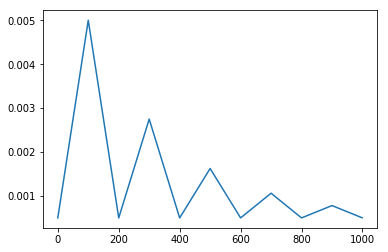

In [0]:
# cyclical learning rate
import matplotlib.pyplot as plt
def get_triangular_lr(iteration, stepsize, base_lr, max_lr):
    """Given the inputs, calculates the lr that should be applicable for this iteration"""
    cycle = np.floor(1 + iteration/(2  * stepsize))
    x = np.abs(iteration/stepsize - 2 * cycle + 1)
    lr = base_lr + (max_lr - base_lr) * np.maximum(0, (1-x))/float(2**(cycle-1))
    return lr

# Demo of how the LR varies with iterations
num_iterations = 1000
stepsize = 100
base_lr = 0.0005
max_lr = 0.005
lr_trend = list()

for iteration in range(num_iterations):
    lr = get_triangular_lr(iteration, stepsize, base_lr, max_lr)
    # Update your optimizer to use this learning rate in this iteration
    lr_trend.append(lr)

plt.plot(lr_trend)

In [0]:
# representer les courbes

In [0]:
# 4 : # freeze all the layers except the dense layers ( Voir plus haut)


In [0]:
################# AVEC LES POIDS ALEATOIRES aleatoires ###############################

In [0]:
image_input = Input(shape=(224, 224, 3))
model = VGG16(input_tensor=image_input, include_top=True,weights=None)
#model.summary()

In [0]:
# to fine tune our model
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model2 = Model(image_input, out)

In [0]:
# 1 : fine tuning total (Ici, on entraîne tout le réseau, donc il faut rendre toutes les couches "entraînables" et les poids aleatoires)
for layer in custom_vgg_model2.layers:
    layer.trainable = True
custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

t=time.time()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 1600 samples, validate on 400 samples
Epoch 1/12
1600/1600 [==============================] - 25s 16ms/step - loss: 1.5633 - acc: 0.9019 - val_loss: 1.8133 - val_acc: 0.8875
Epoch 2/12
1600/1600 [==============================] - 23s 15ms/step - loss: 1.5816 - acc: 0.9019 - val_loss: 1.8133 - val_acc: 0.8875
Epoch 3/12
1600/1600 [==============================] - 23s 15ms/step - loss: 1.5816 - acc: 0.9019 - val_loss: 1.8133 - val_acc: 0.8875
Epoch 4/12
1600/1600 [==============================] - 24s 15ms/step - loss: 1.5816 - acc: 0.9019 - val_loss: 1.8133 - val_acc: 0.8875
Epoch 5/12
1600/1600 [==============================] - 24s 15ms/step - loss: 1.5816 - acc: 0.9019 - val_loss: 1.8133 - val_acc: 0.8875
Epoch 6/12
1600/1600 [==============================] - 24s 15ms/step - loss: 1.5816 - acc: 0.9019 - val_loss: 1.8133 - val_acc: 0.8875
Epoch 7/12
1600/1600 [==============================] - 24s 15ms/step - loss: 1.5816 - acc: 0.9019 - val_loss: 1.8133 - val_acc: 0.8875
E

In [0]:
# representer les courbes

In [0]:
# 3 : fine tuning partiel(On entraîne le nouveau classifieur et les couches hautes)
# Ne pas entraîner les 5 premières couches (les plus basses) 
for layer in custom_vgg_model2.layers[:5]:
    layer.trainable = False
custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

t=time.time()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 1600 samples, validate on 400 samples
Epoch 1/12
1600/1600 [==============================] - 20s 12ms/step - loss: 1.5816 - acc: 0.9019 - val_loss: 1.8133 - val_acc: 0.8875
Epoch 2/12
1600/1600 [==============================] - 18s 11ms/step - loss: 1.5816 - acc: 0.9019 - val_loss: 1.8133 - val_acc: 0.8875
Epoch 3/12
1600/1600 [==============================] - 18s 11ms/step - loss: 1.5816 - acc: 0.9019 - val_loss: 1.8133 - val_acc: 0.8875
Epoch 4/12
1600/1600 [==============================] - 18s 11ms/step - loss: 1.5816 - acc: 0.9019 - val_loss: 1.8133 - val_acc: 0.8875
Epoch 5/12
1600/1600 [==============================] - 18s 11ms/step - loss: 1.5816 - acc: 0.9019 - val_loss: 1.8133 - val_acc: 0.8875
Epoch 6/12
1600/1600 [==============================] - 18s 11ms/step - loss: 1.5816 - acc: 0.9019 - val_loss: 1.8133 - val_acc: 0.8875
Epoch 7/12
1600/1600 [==============================] - 18s 11ms/step - loss: 1.5816 - acc: 0.9019 - val_loss: 1.8133 - val_acc: 0.8875
E

In [0]:
# representer les courbes